In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
datasets = pd.read_csv('x6.csv')
data = np.array(datasets)
data.shape

(28, 5)

In [3]:
train_data1, test_data1 = train_test_split(data, test_size=0.53, shuffle=False)

In [4]:
train_data=train_data1[:,:-1]
train_data_o=train_data1[:,-1]
test_data=test_data1[:,:-1]
test_data_o=test_data1[:,-1]

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_x=scaler.fit_transform(train_data)
train_y=scaler.fit_transform(train_data_o.reshape(-1,1)).reshape(train_data_o.shape)
test_x=scaler.fit_transform(test_data)
test_y=scaler.fit_transform(test_data_o.reshape(-1,1)).reshape(test_data_o.shape)

In [6]:
regressor = RandomForestRegressor(n_estimators = 300)
regressor.fit(train_x,train_y)

Y_pred = regressor.predict(test_x)
Y_pred_rescale=scaler.inverse_transform(Y_pred.reshape(-1,1))
test_y_rescale=scaler.inverse_transform(test_y.reshape(-1,1))
Y_pred_rescale,test_y_rescale

(array([[40.08554167],
        [40.08645833],
        [39.99875   ],
        [40.13491667],
        [40.05954167],
        [39.97166667],
        [40.06029167],
        [40.05175   ],
        [40.05004167],
        [40.00308333],
        [40.084625  ],
        [40.16216667],
        [40.17091667],
        [40.17154167],
        [40.08691667]]),
 array([[40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9]]))

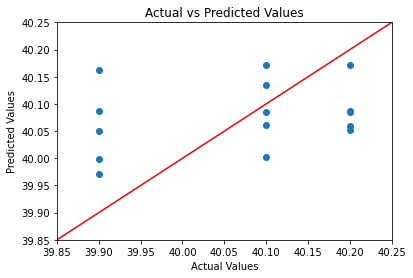

MSE:  0.01514772951388888
RMSE:  0.12307611268596713


In [7]:
x_range=[39.85,40.25]
y_range=[39.85,40.25]
plt.xlim(x_range)
plt.ylim(y_range)
plt.plot(x_range, y_range, color='red')
plt.scatter(test_y_rescale,Y_pred_rescale)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
mse = mean_squared_error(test_y_rescale,Y_pred_rescale)
rmse = np.sqrt(mse)
print("MSE: ",  mse)
print("RMSE: ", rmse)